In [ ]:
!sudo add-apt-repository ppa:alex-p/tesseract-ocr5

Repository: 'deb https://ppa.launchpadcontent.net/alex-p/tesseract-ocr5/ubuntu/ jammy main'
Description:
 The Tesseract OCR engine was one of the top 3 engines in the 1995
 UNLV Accuracy test. Between 1995 and 2006 it had little work done on
 it, but since then it has been improved extensively by Google and is
 probably one of the most accurate open source OCR engines
 available. It can read a wide variety of image formats and convert
 them to text in over 40 languages. This package includes the command
 line tool.
More info: https://launchpad.net/~alex-p/+archive/ubuntu/tesseract-ocr5
Adding repository.
Press [ENTER] to continue or Ctrl-c to cancel.
Adding deb entry to /etc/apt/sources.list.d/alex-p-ubuntu-tesseract-ocr5-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/alex-p-ubuntu-tesseract-ocr5-jammy.list
Adding key to /etc/apt/trusted.gpg.d/alex-p-ubuntu-tesseract-ocr5.gpg with fingerprint 03645B99FA4163FE8C2508BC3A788ED11EFFCAF9

Get:1 http://security.ubuntu.co

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!mkdir -p /usr/share/tesseract-ocr/5/tessdata
!wget https://github.com/tesseract-ocr/tessdata_best/raw/main/eng.traineddata -O /usr/share/tesseract-ocr/5/tessdata/eng.traineddata

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libtesseract5
The following NEW packages will be installed:
  libtesseract5
The following packages will be upgraded:
  tesseract-ocr
1 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 1,713 kB of archives.
After this operation, 3,567 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/alex-p/tesseract-ocr5/ubuntu jammy/main amd64 libtesseract5 amd64 5.4.1-1ppa1~jammy1 [1,347 kB]
Get:2 https://ppa.launchpadcontent.net/alex-p/tesseract-ocr5/ubuntu jammy/main amd64 tesseract-ocr amd64 5.4.1-1ppa1~jammy1 [366 kB]
Fetched 1,713 kB in 3s (518 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to fronte

In [ ]:
!tesseract --version

tesseract 5.4.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE4.1
 Found OpenMP 201511
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8
 Found libcurl/7.81.0 OpenSSL/3.0.2 zlib/1.2.11 brotli/1.0.9 zstd/1.4.8 libidn2/2.3.2 libpsl/0.21.0 (+libidn2/2.3.2) libssh/0.9.6/openssl/zlib nghttp2/1.43.0 librtmp/2.3 OpenLDAP/2.5.17


In [ ]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow
from PIL import Image
import numpy as np
import os

In [ ]:
def bwareaopen(image:np.array, size:int):
    '''
    Remove targets with less than a certain number of pixels in a binary image
    @param image: numpy.array, source image, must be a binary image
    @param size: int, size of the area to be removed
    @return output: numpy.array, binary image with small targets removed
    '''
    output=image.copy()
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=8)
    for i in range(1,nlabels):
        regions_size=stats[i,4]
        if regions_size<size:
            output[labels == i] = 0
    return output

In [ ]:
i1 = cv2.imread('I1.png')
i1 = cv2.cvtColor(i1, cv2.COLOR_BGR2GRAY)

In [ ]:
cv2_imshow(i1)

In [ ]:
i1_blurred = cv2.medianBlur(i1, 5)

In [ ]:
cv2_imshow(i1_blurred)

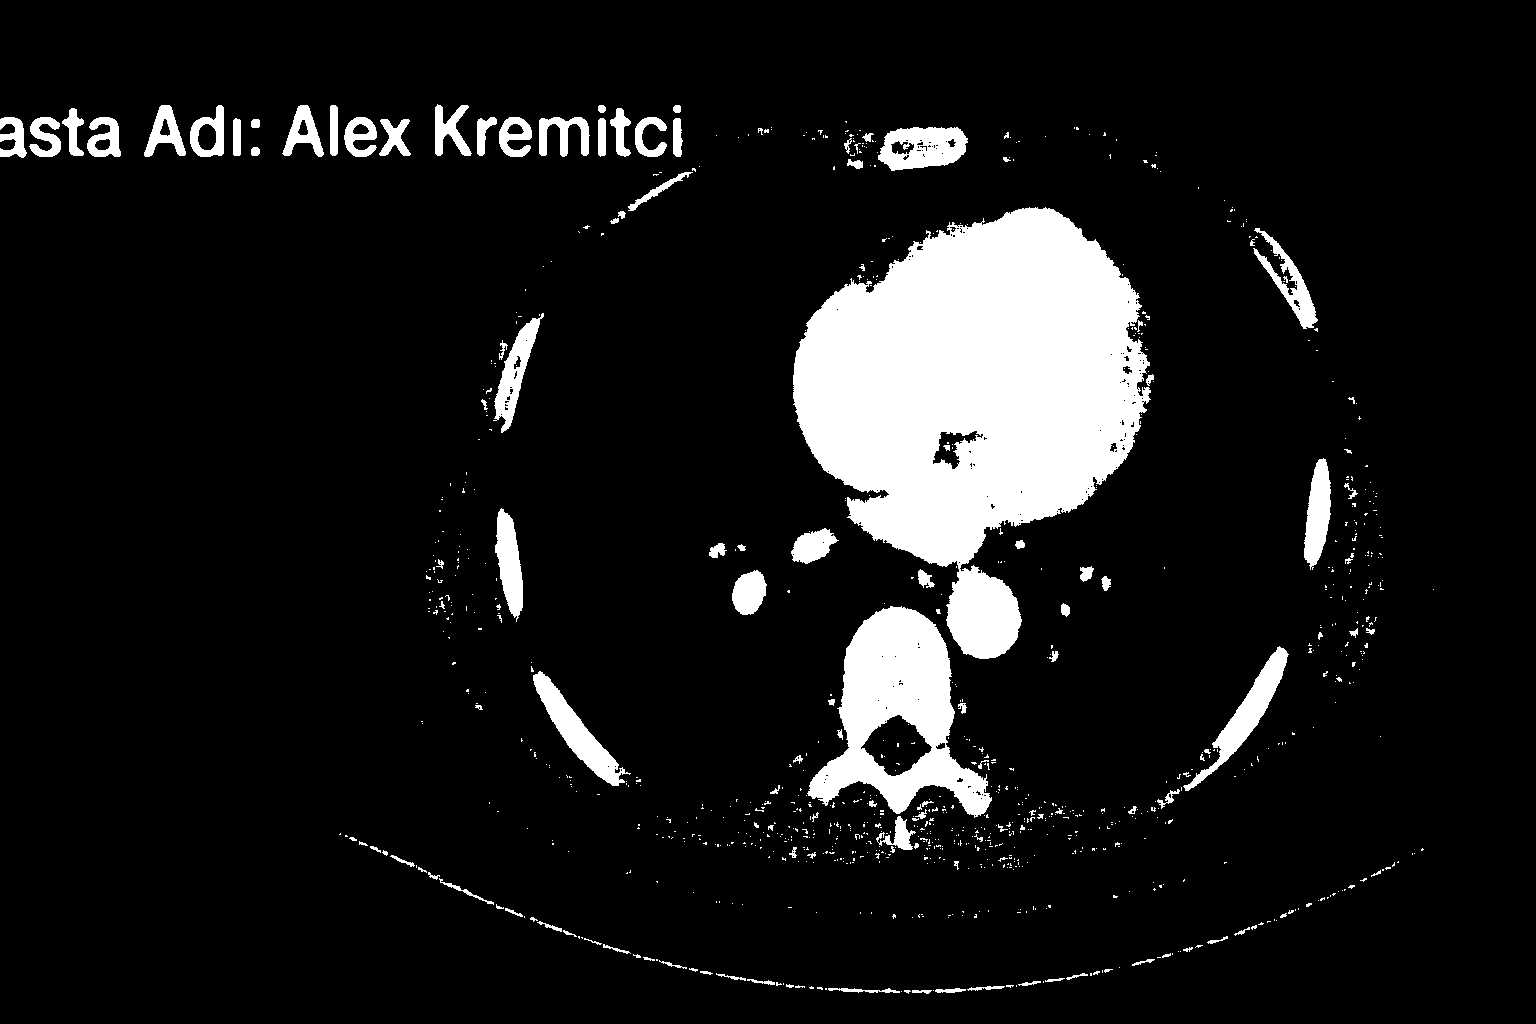

In [ ]:
_, i1_thresh = cv2.threshold(i1_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(i1_thresh)

In [ ]:
i1_text = pytesseract.image_to_string(i1_thresh)
i1_text

'asta Adi: Alex Kremitci\n\n'

In [ ]:
i1_name = i1_text.split(":", 1)[1].strip()
i1_name

'Alex Kremitci'

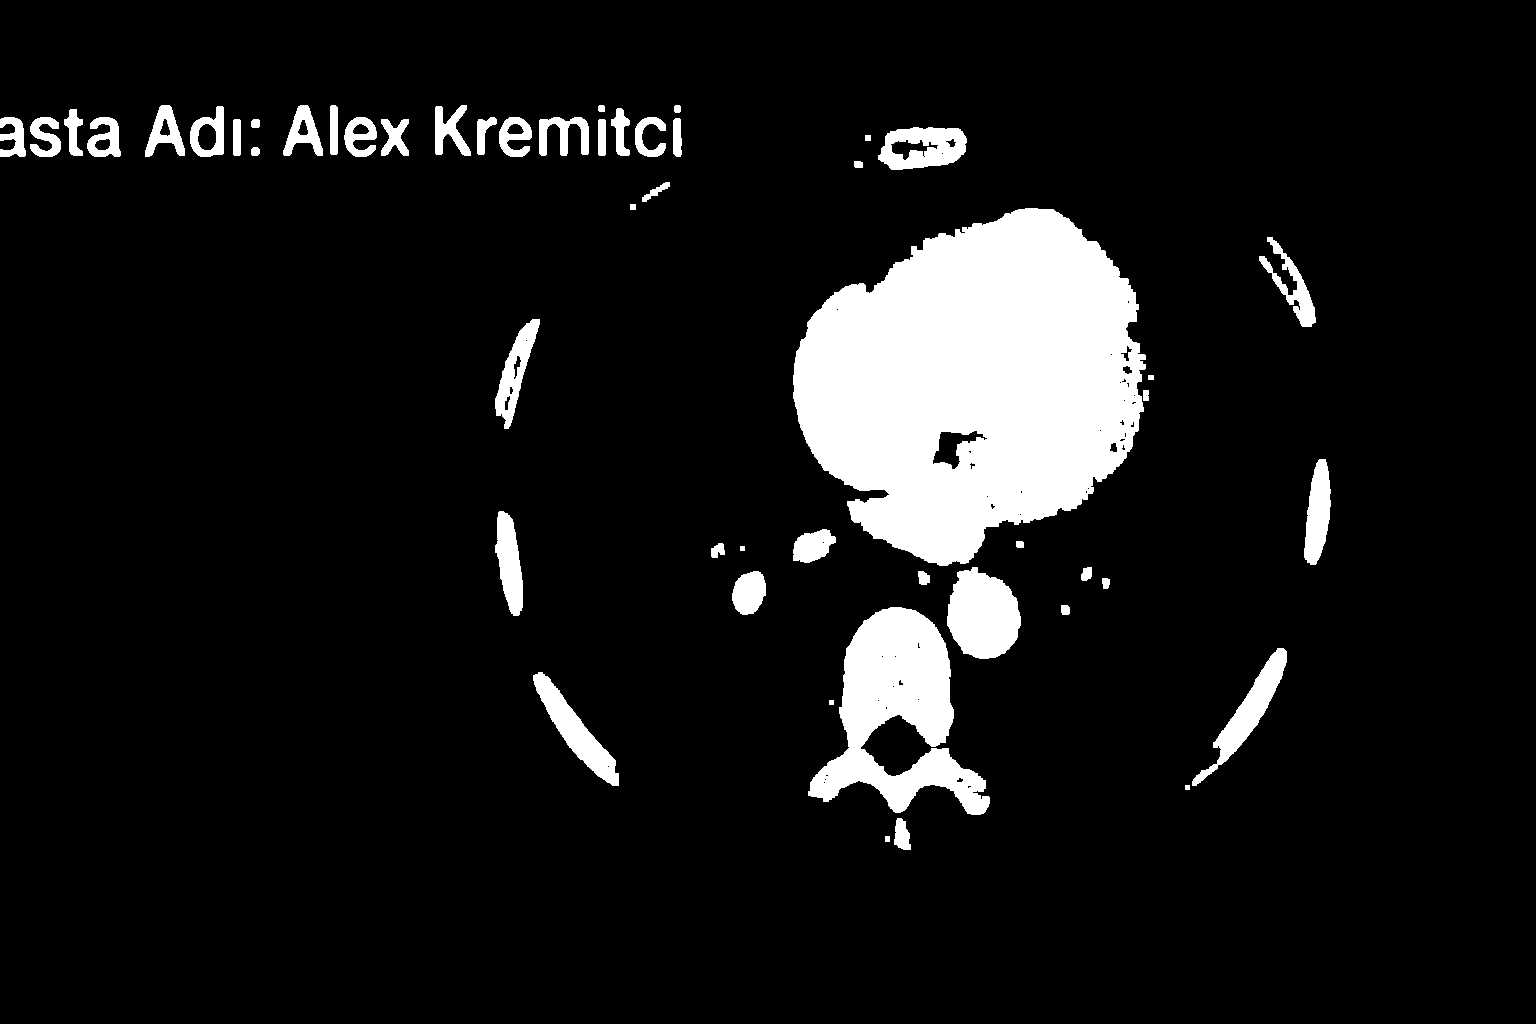

In [ ]:
kernel = np.ones((5, 5), np.uint8)  # veya (3,3), (7,7) ile dene
i1_opened = cv2.morphologyEx(i1_thresh, cv2.MORPH_OPEN, kernel)

cv2_imshow(i1_opened)

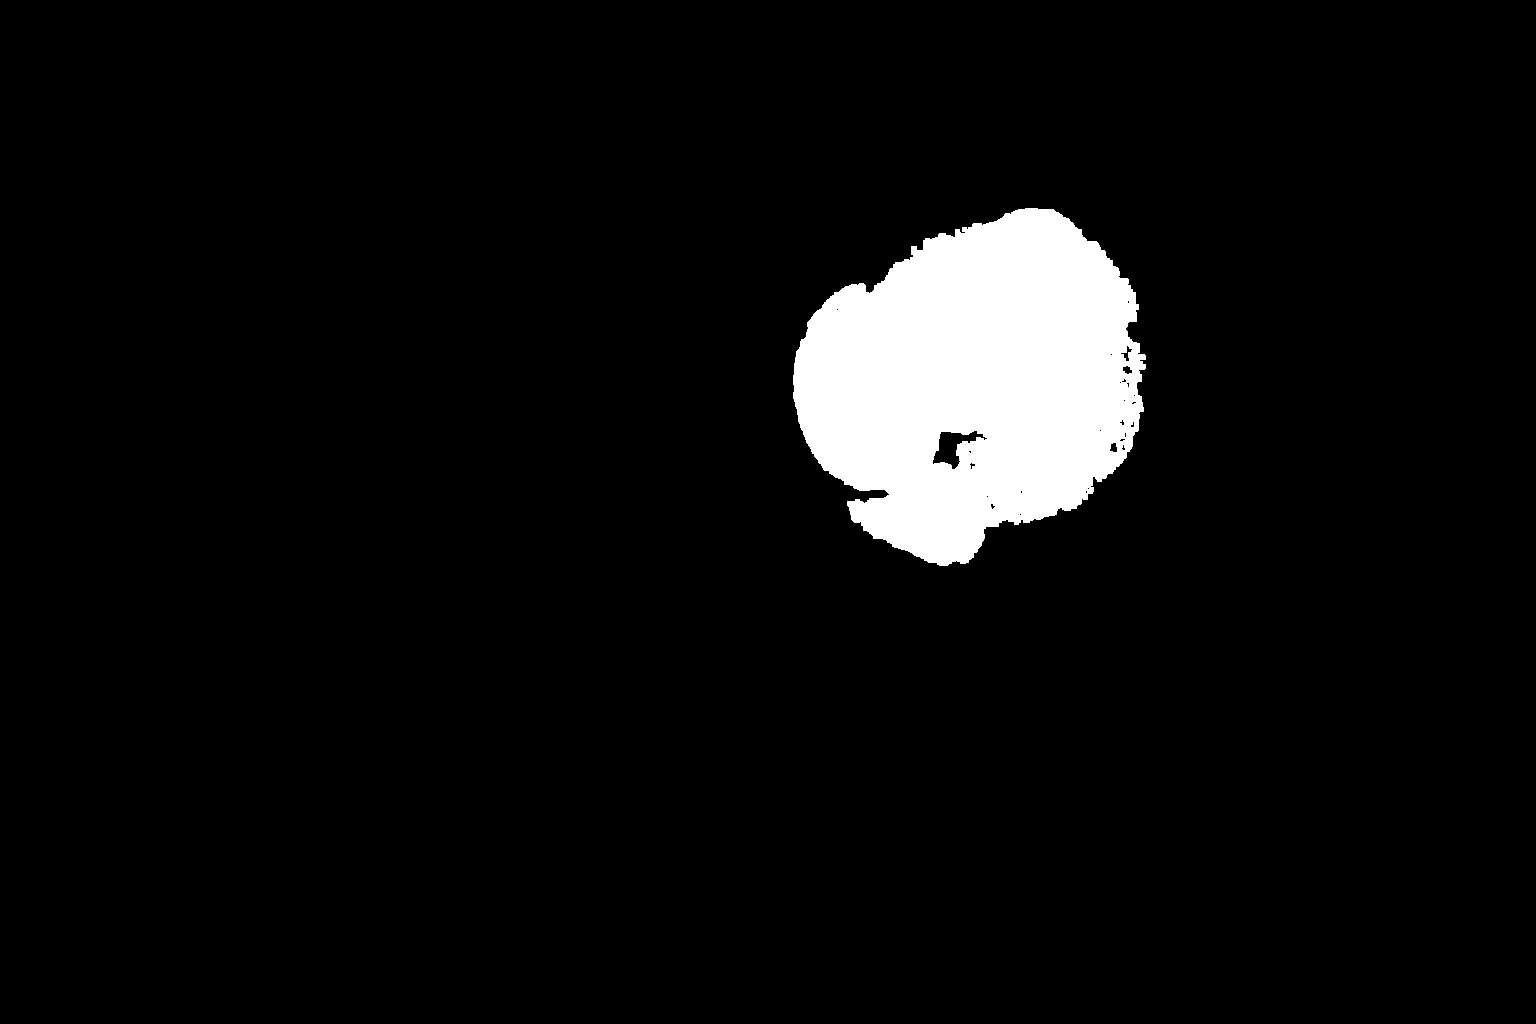

In [ ]:
i1_cleaned = bwareaopen(i1_opened, 20000)

cv2_imshow(i1_cleaned)

In [ ]:
# Beyaz (255) piksellerin koordinatlarını bul
white_pixels = np.column_stack(np.where(i1_cleaned == 255))

# Min ve max X, Y koordinatlarını bul
min_x, min_y = white_pixels.min(axis=0)
max_x, max_y = white_pixels.max(axis=0)

print(f"Min X: {min_x}, Min Y: {min_y}")
print(f"Max X: {max_x}, Max Y: {max_y}")

Min X: 208, Min Y: 793
Max X: 565, Max Y: 1145


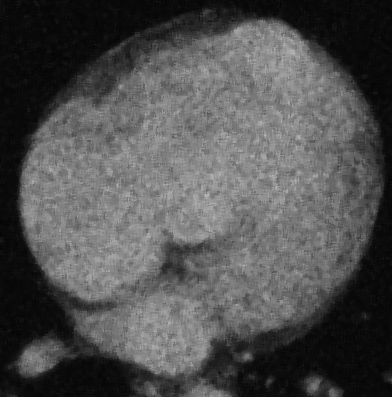

In [ ]:
# Görüntüdeki beyaz alanın bulunduğu kısmı kırp
i1_cropped = i1_blurred[(min_x - 20):(max_x + 20), (min_y - 20):(max_y + 20)]

cv2_imshow(i1_cropped)

In [ ]:
# 1. Klasörü oluştur
output_dir = os.path.join(".", i1_name)
os.makedirs(output_dir, exist_ok=True)

# 2. Kaydedilecek dosya yolu
output_path = os.path.join(output_dir, "I1_cropped.png")

# 3. Resmi kaydet
cv2.imwrite(output_path, i1_cropped)

True

# I2

In [ ]:
i2 = cv2.imread('I2.png')
i2 = cv2.cvtColor(i2, cv2.COLOR_BGR2GRAY)

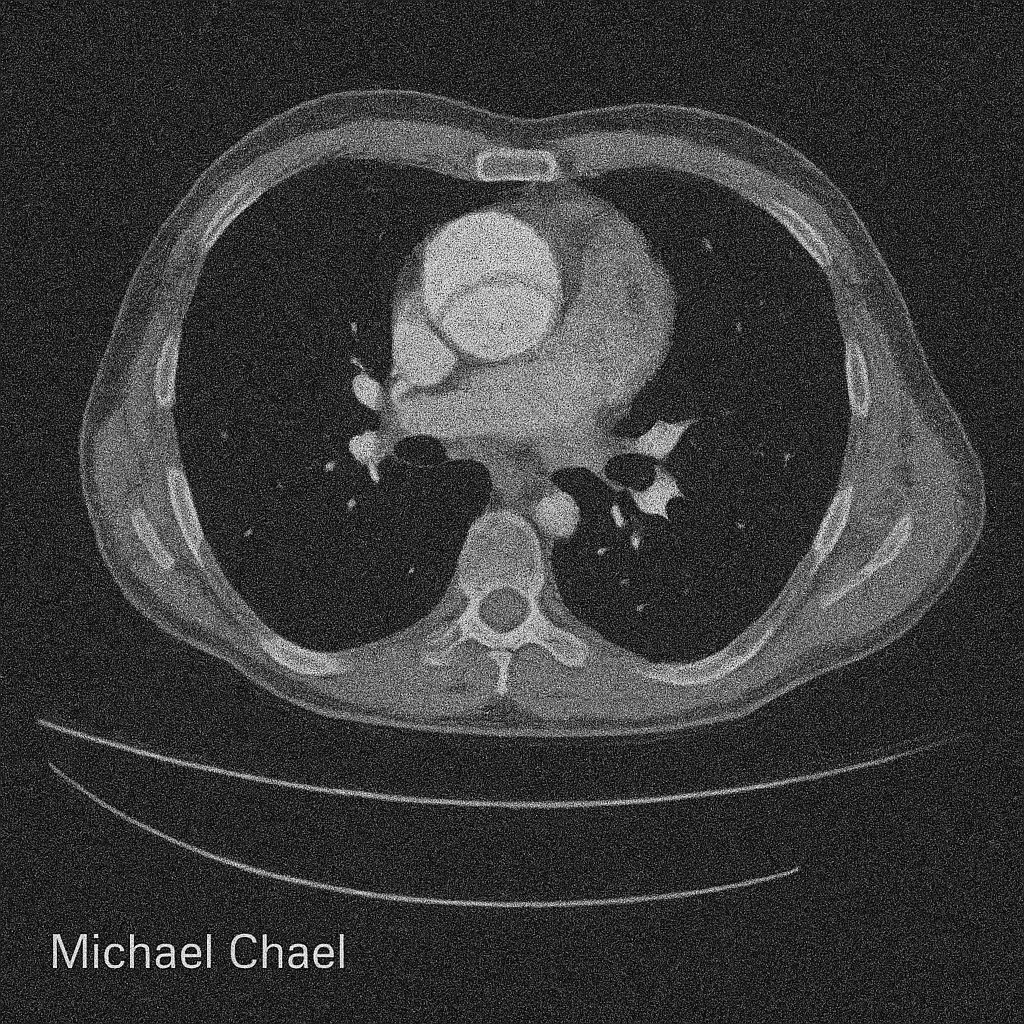

In [ ]:
cv2_imshow(i2)

In [ ]:
i2_blurred = cv2.fastNlMeansDenoising(i2, None, h=20, templateWindowSize=7, searchWindowSize=21)

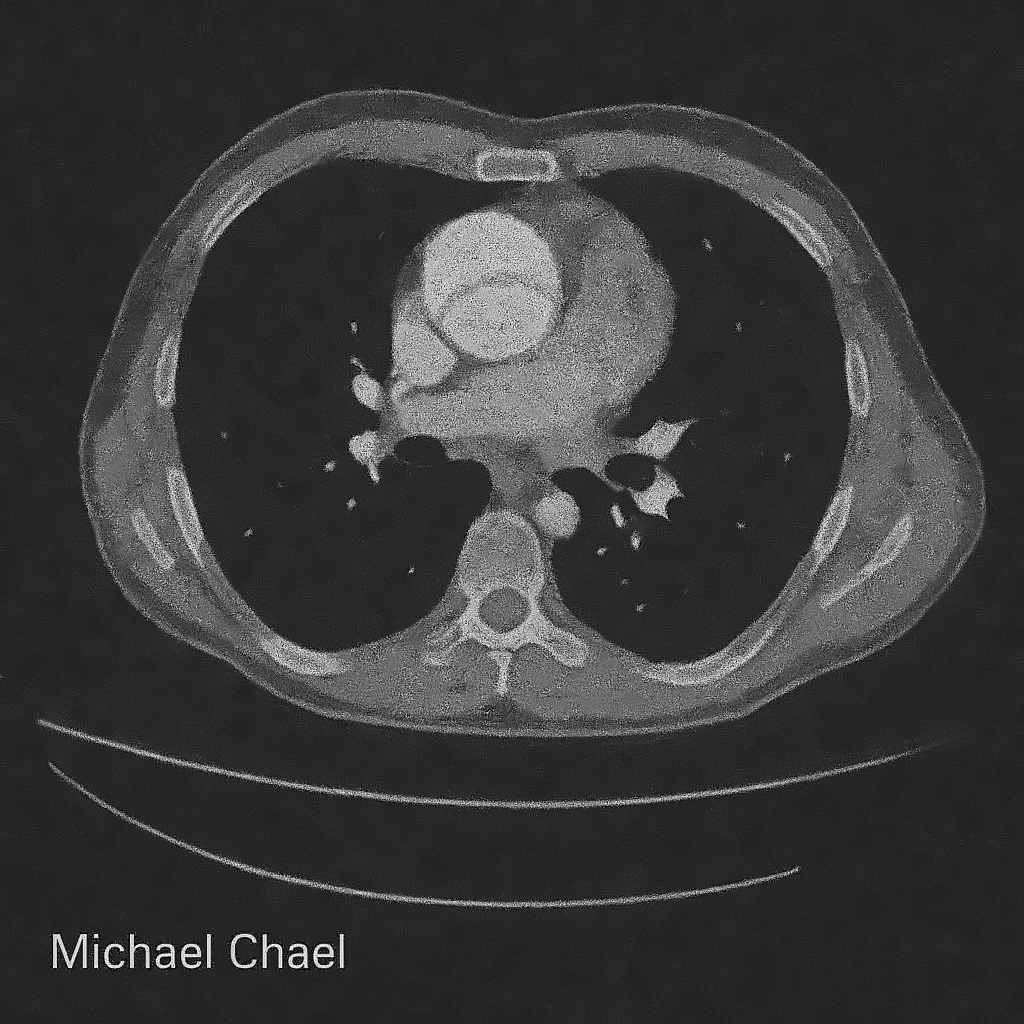

In [ ]:
cv2_imshow(i2_blurred)

In [ ]:
i2_text = pytesseract.image_to_string(i2_blurred)
i2_text

'Michael Chael\n'

In [ ]:
i2_name = i2_text.strip()
i2_name

'Michael Chael'

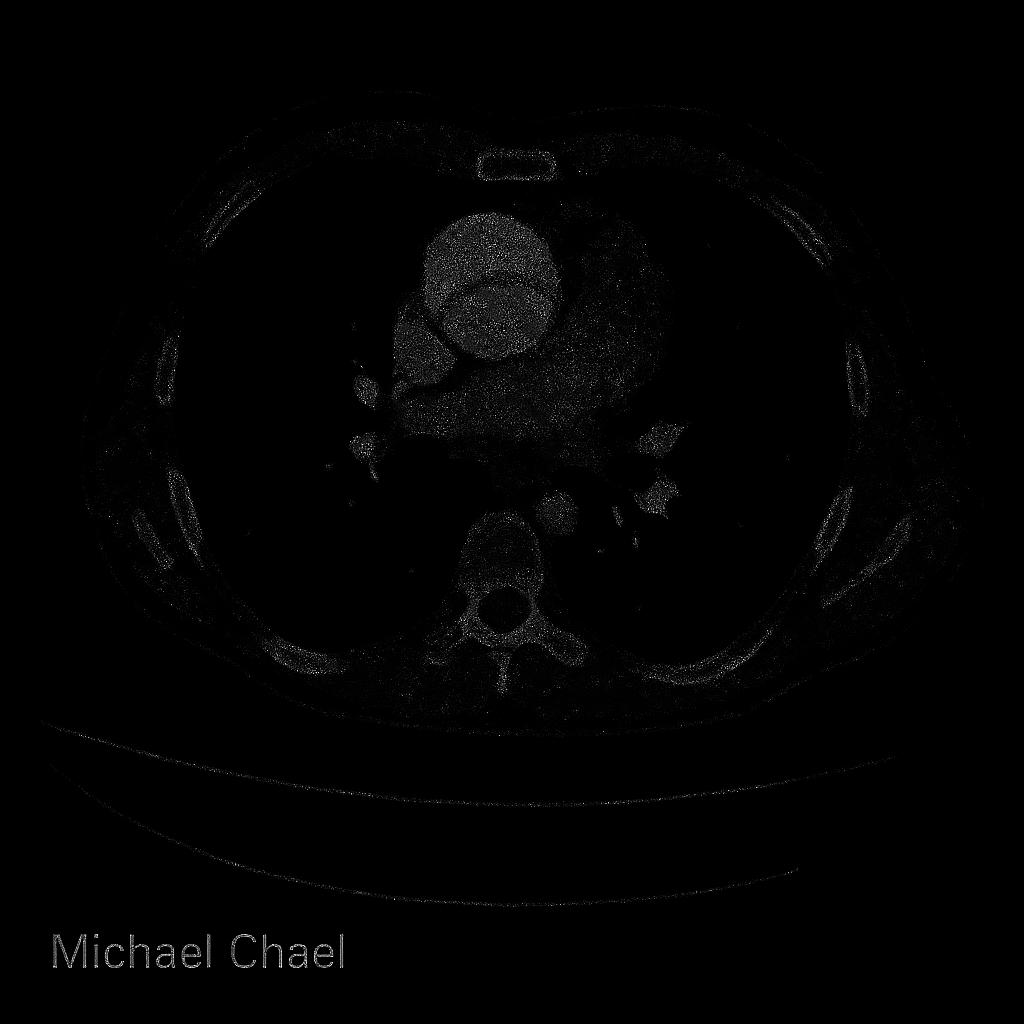

In [ ]:
# Görüntüyü 0-1 aralığına normalize et
i2_norm = i2_blurred / 255.0

i2_gamma = 6.0  # gamma > 1 → parlak bölgeler vurgulanır
i2_gamma_corrected = np.power(i2_norm, i2_gamma)

# Normalizasyon ve uint8'e dönüş
i2_gamma_corrected = cv2.normalize(i2_gamma_corrected, None, 0, 255, cv2.NORM_MINMAX)
i2_gamma_corrected = np.uint8(i2_gamma_corrected)

cv2_imshow(i2_gamma_corrected)

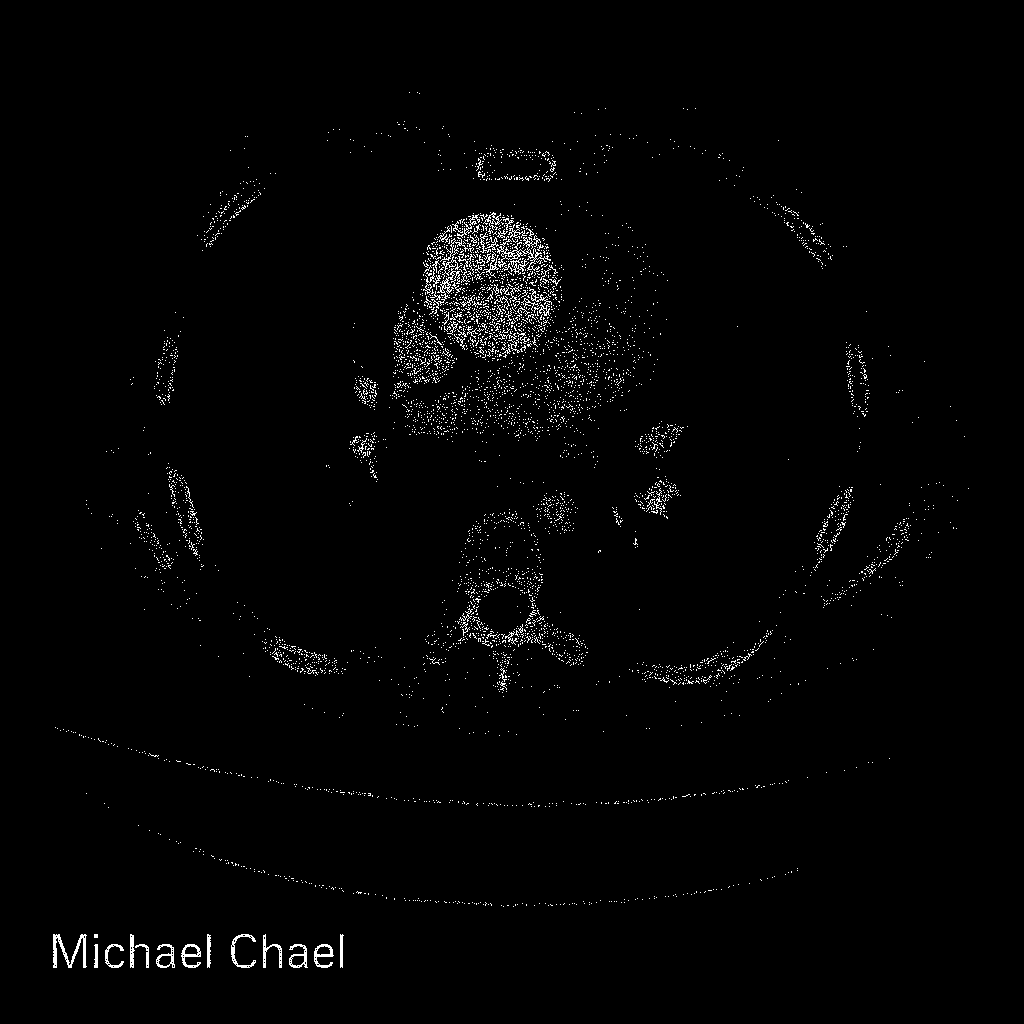

In [ ]:
_, i2_thresh = cv2.threshold(i2_gamma_corrected, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(i2_thresh)

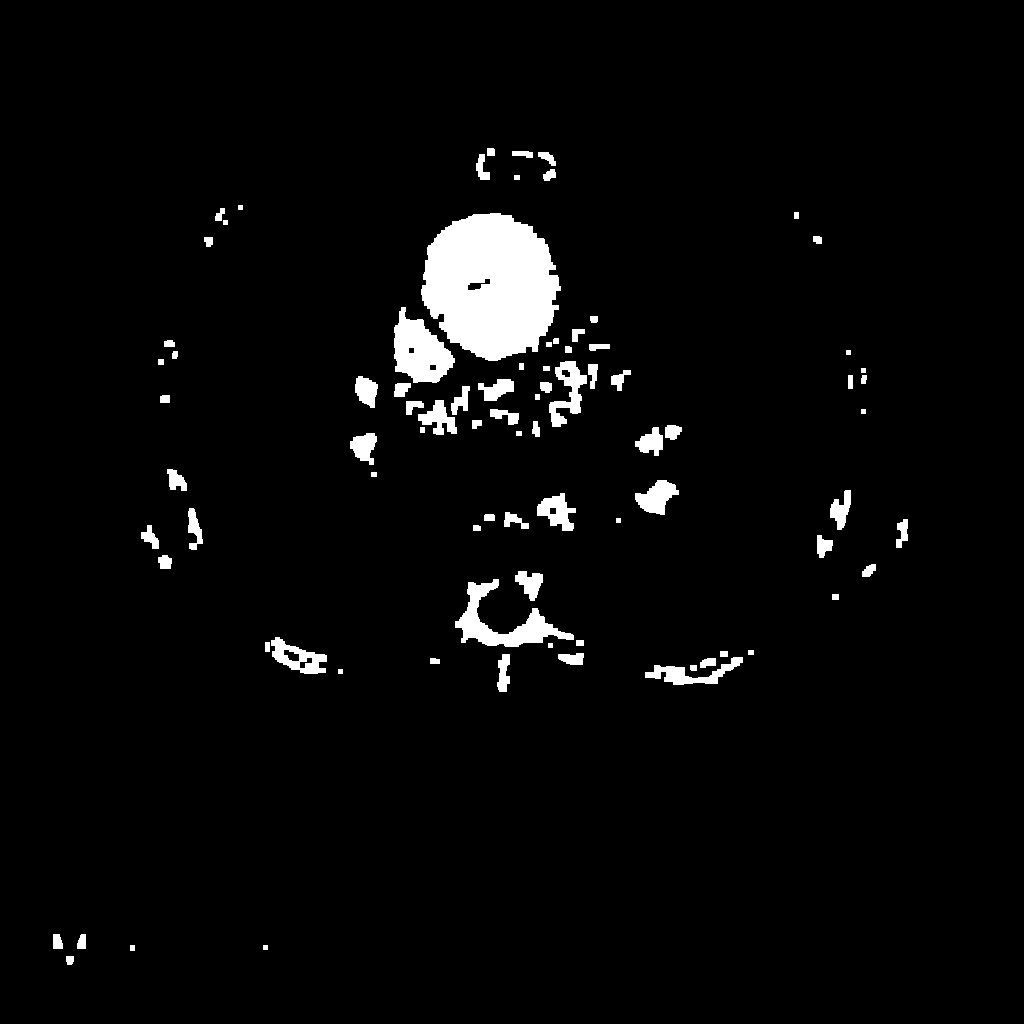

In [ ]:
kernel = np.ones((5, 5), np.uint8)  # veya (3,3), (7,7) ile dene
i2_opened = cv2.morphologyEx(i2_thresh, cv2.MORPH_CLOSE, kernel)
i2_opened = cv2.morphologyEx(i2_opened, cv2.MORPH_OPEN, kernel)

cv2_imshow(i2_opened)

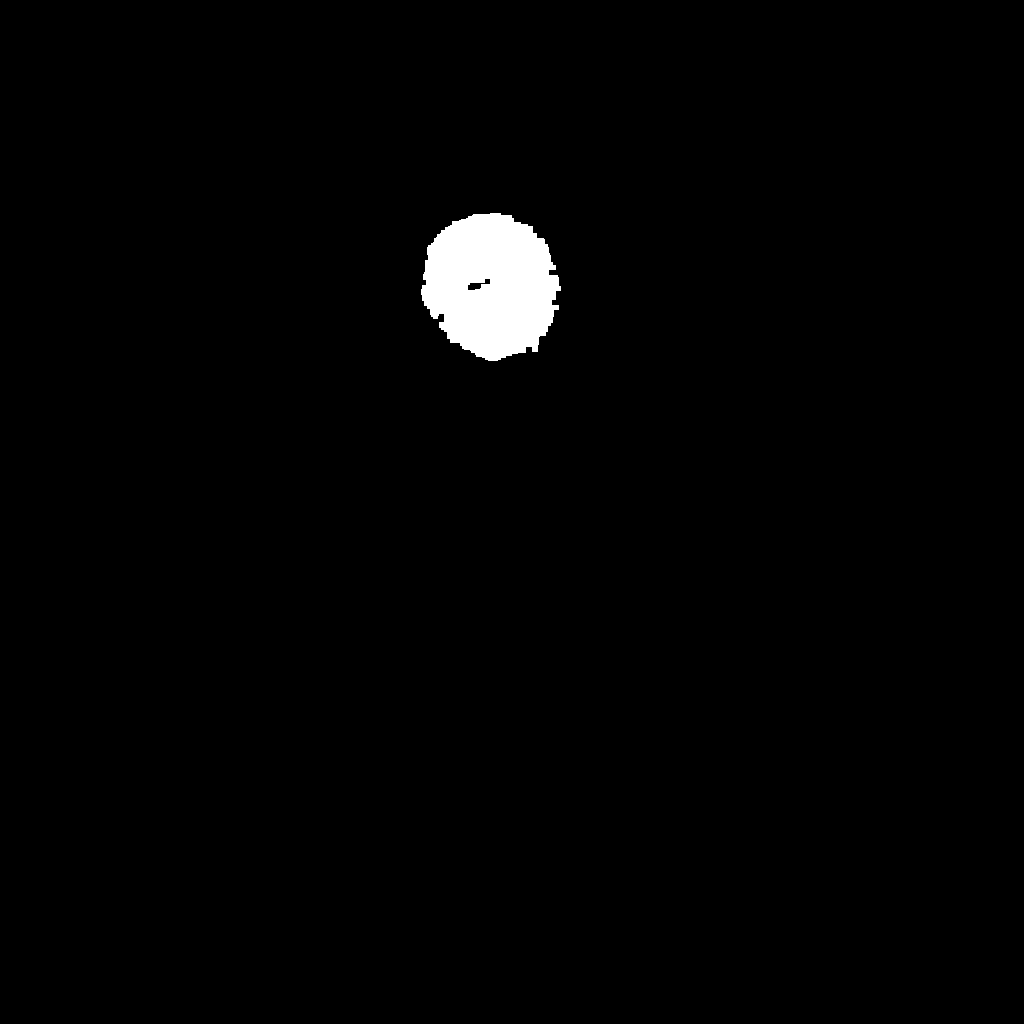

In [ ]:
i2_cleaned = bwareaopen(i2_opened, 10000)

cv2_imshow(i2_cleaned)

In [ ]:
# Beyaz (255) piksellerin koordinatlarını bul
white_pixels = np.column_stack(np.where(i2_cleaned == 255))

# Min ve max X, Y koordinatlarını bul
min_x, min_y = white_pixels.min(axis=0)
max_x, max_y = white_pixels.max(axis=0)

print(f"Min X: {min_x}, Min Y: {min_y}")
print(f"Max X: {max_x}, Max Y: {max_y}")

Min X: 213, Min Y: 421
Max X: 360, Max Y: 560


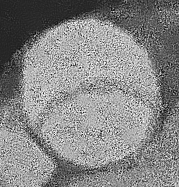

In [ ]:
# Görüntüdeki beyaz alanın bulunduğu kısmı kırp
i2_cropped = i2_blurred[(min_x - 20):(max_x + 20), (min_y - 20):(max_y + 20)]

cv2_imshow(i2_cropped)

In [ ]:
# 1. Klasörü oluştur
output_dir = os.path.join(".", i2_name)
os.makedirs(output_dir, exist_ok=True)

# 2. Kaydedilecek dosya yolu
output_path = os.path.join(output_dir, "I1_cropped.png")

# 3. Resmi kaydet
cv2.imwrite(output_path, i2_cropped)

True